In [1]:
import pandas as pd
import glob
import asyncio
from playwright.async_api import async_playwright
import nest_asyncio
# Allow nested event loops in Jupyter Notebook
nest_asyncio.apply()
from bs4 import BeautifulSoup
import re
import calendar
import locale
import yfinance
# Set the locale to German


In [2]:
sandp500 = yfinance.download (tickers = "IVV", start = "2025-01-01", 
                              interval = "1d")
sandp500

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,IVV,IVV,IVV,IVV,IVV
Date,,,,,
2025-01-02,583.806824,590.226722,579.712380,588.497523,9400400
2025-01-03,590.922363,591.737285,585.615515,586.678886,5867300
2025-01-06,594.589478,598.823068,592.731080,595.434242,4188000
2025-01-07,587.901306,596.845491,585.943492,596.567199,3810700
2025-01-08,588.517456,589.690131,584.333543,587.821785,5303600
...,...,...,...,...,...
2025-07-11,626.440002,627.820007,624.520020,625.760010,2739200
2025-07-14,627.739990,628.140015,624.750000,626.169983,2590500


In [3]:
sandp500 = sandp500.reset_index()

In [4]:
sandp500.columns = ['date', 'close', 'high', 'low', "open", 'volume']
sandp500

,date,close,high,low,open,volume
0,2025-01-02,583.806824,590.226722,579.712380,588.497523,9400400
1,2025-01-03,590.922363,591.737285,585.615515,586.678886,5867300
2,2025-01-06,594.589478,598.823068,592.731080,595.434242,4188000
3,2025-01-07,587.901306,596.845491,585.943492,596.567199,3810700
4,2025-01-08,588.517456,589.690131,584.333543,587.821785,5303600
...,...,...,...,...,...,...
129,2025-07-11,626.440002,627.820007,624.520020,625.760010,2739200
130,2025-07-14,627.739990,628.140015,624.750000,626.169983,2590500
131,2025-07-15,624.989990,630.859985,624.989990,630.520020,3813800
132,2025-07-16,627.250000,627.719971,621.049988,626.760010,4667300


In [5]:
sandp500["perc_change"]=(sandp500["close"]-sandp500["close"].shift(1))*100/ sandp500["close"].shift(1)
sandp500

,date,close,high,low,open,volume,perc_change
0,2025-01-02,583.806824,590.226722,579.712380,588.497523,9400400,NaN
1,2025-01-03,590.922363,591.737285,585.615515,586.678886,5867300,1.218817
2,2025-01-06,594.589478,598.823068,592.731080,595.434242,4188000,0.620575
3,2025-01-07,587.901306,596.845491,585.943492,596.567199,3810700,-1.124839
4,2025-01-08,588.517456,589.690131,584.333543,587.821785,5303600,0.104805
...,...,...,...,...,...,...,...
129,2025-07-11,626.440002,627.820007,624.520020,625.760010,2739200,-0.383235
130,2025-07-14,627.739990,628.140015,624.750000,626.169983,2590500,0.207520
131,2025-07-15,624.989990,630.859985,624.989990,630.520020,3813800,-0.438079
132,2025-07-16,627.250000,627.719971,621.049988,626.760010,4667300,0.361607


In [6]:
sandp500[sandp500["perc_change"]<=-2]

,date,close,high,low,open,volume,perc_change
44,2025-03-10,559.945740,568.671258,554.787924,566.753234,7935600,-2.604972
58,2025-03-28,556.382690,567.109207,555.954036,566.341584,7466000,-2.018895
62,2025-04-03,538.388916,548.756507,537.740915,545.905424,12111300,-4.783142
63,2025-04-04,506.029938,526.605706,505.840557,524.482331,17517100,-6.010335
67,2025-04-10,525.419373,534.261757,510.336464,533.015648,10186400,-3.513051
71,2025-04-16,526.496033,535.876715,521.112817,532.467377,6763400,-2.230700
73,2025-04-21,514.772644,522.428731,509.239902,522.020034,4588600,-2.324695


In [7]:
(sandp500[sandp500["perc_change"]<=-2]["close"]).sum()

np.float64(3727.435333251953)

In [8]:
sandp500.iloc[51, 1]

np.float64(566.241943359375)

In [9]:
sandp500.iloc[50]

date           2025-03-18 00:00:00
close                   560.180847
high                    564.168396
low                     558.217008
open                      564.0189
volume                    18534400
perc_change               -1.04165
Name: 50, dtype: object

In [10]:
(sandp500.iloc[119, 1]-sandp500.iloc[50, 1])/sandp500.iloc[50, 1]

np.float64(0.09743132574700618)

In [11]:
sandp500.iloc[119]

date           2025-06-26 00:00:00
close                    614.76001
high                     615.22998
low                     611.280029
open                    611.900024
volume                     4955900
perc_change               0.786935
Name: 119, dtype: object

In [12]:
list_of_drop_indices=sandp500[sandp500["perc_change"]<=-2].index.tolist()
list_of_drop_indices

[44, 58, 62, 63, 67, 71, 73]

In [47]:
outer_array = []
saved_profit=0

max_amount_of_investment=0
portfolio_df=pd.DataFrame(columns=["date", "price_bought", "price_target","share_held"])
for index, row in sandp500.iterrows():
    row_list = []
    row_list.append(row["date"])
    current_price = row["close"]
    if len(portfolio_df) > 0:
        current_amount_of_shares = portfolio_df["share_held"].sum()
        current_amount_of_investment = (portfolio_df["share_held"]* portfolio_df["price_bought"]).sum()
        influx_profit = (current_amount_of_shares * current_price - current_amount_of_investment)
        if current_amount_of_investment > max_amount_of_investment:
            max_amount_of_investment = current_amount_of_investment
    else:
        current_amount_of_shares = 0
        current_amount_of_investment = 0
        influx_profit = 0
    if row["perc_change"] <= -2:
        share_held = 100 / current_price
        price_target = sandp500.iloc[index-1]["close"]
        new_row = pd.DataFrame([{
            "date": row["date"], 
            "price_bought": current_price, 
            "price_target": price_target, 
            "share_held": share_held
        }])
        portfolio_df = pd.concat([portfolio_df, new_row], ignore_index=True)
        print("dip",len(portfolio_df))
        
    if len(portfolio_df[portfolio_df["price_target"]<current_price])>0:
        shares_to_sell = portfolio_df[portfolio_df["price_target"] < current_price]
        sum_shares_to_sell = shares_to_sell["share_held"].sum()
        price_sell_share = sum_shares_to_sell*current_price
        price_bought_share=(shares_to_sell["price_bought"]*shares_to_sell["share_held"]).sum()
        profit=price_sell_share-price_bought_share
        saved_profit+=profit
        portfolio_df = portfolio_df[portfolio_df["price_target"] >= current_price]

    overall_profit = saved_profit + influx_profit
    print
    overall_profit_percentage = overall_profit / max_amount_of_investment * 100 if max_amount_of_investment > 0 else 0
    row_list.append(overall_profit_percentage)
    outer_array.append(row_list)

        

dip 1
dip 1
dip 2
dip 3
dip 3
dip 4
dip 5


/var/folders/m2/_syds9sn2bjctwpf6p3_w19r0000gn/T/ipykernel_2032/2993730516.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  portfolio_df = pd.concat([portfolio_df, new_row], ignore_index=True)


<Axes: xlabel='date'>

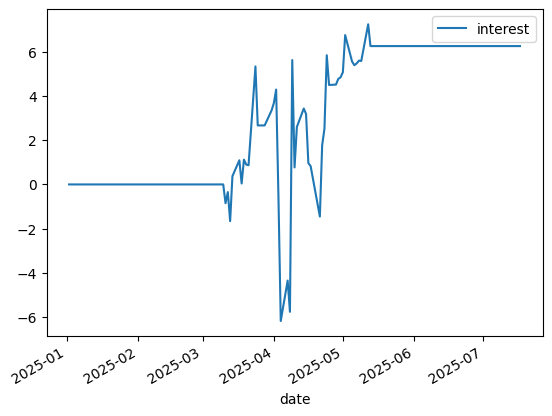

In [48]:
df=pd.DataFrame(outer_array, columns=["date", "interest"]).set_index("date")
df.plot()

In [49]:
df

,interest
date,
2025-01-02,0.000000
2025-01-03,0.000000
2025-01-06,0.000000
2025-01-07,0.000000
2025-01-08,0.000000
...,...
2025-07-11,6.272726
2025-07-14,6.272726
2025-07-15,6.272726


In [43]:
df.to_csv("strategie_3.csv")